In [58]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os

import pickle as pkl


## The first thing to check is whether the trailblaze algorithm for sMC generates a consistent lambda path for triplicate experiments given the same trailblaze observable threshold (and ESS threshold of 0.8 for resampling)

In [60]:
#pull appropriate files
feps_99_threshold = {i: [] for i in range(1,8)}
for lig_index in range(1,8):
    print(f"loading {lig_index}")
    for trial in range(1,4):
        path = os.path.join(os.getcwd(),f"lig0to{lig_index}", f"trailblaze_sMC_ESS_0.99_trial_{trial}_solvent_fep.neq.pkl")
        with open(path, 'rb') as f:
            ne = pkl.load(f)
        feps_99_threshold[lig_index].append(ne)

loading 1
loading 2
loading 3
loading 4
loading 5
loading 6
loading 7


In [61]:
#pull appropriate files
feps_995_threshold = {i: [] for i in range(1,8)}
for lig_index in range(1,8):
    print(f"loading {lig_index}")
    for trial in range(1,4):
        path = os.path.join(os.getcwd(),f"lig0to{lig_index}", f"trailblaze_sMC_ESS_0.995_trial_{trial}_solvent_fep.neq.pkl")
        with open(path, 'rb') as f:
            ne = pkl.load(f)
        feps_995_threshold[lig_index].append(ne)

loading 1
loading 2
loading 3
loading 4
loading 5
loading 6
loading 7


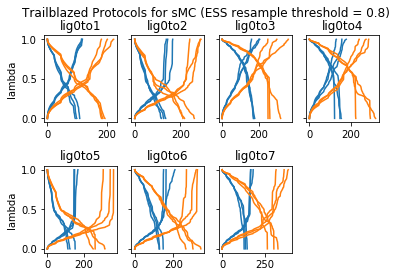

In [63]:
#now we will plot all of the trailblazed protocols
fig, axs = plt.subplots(2,4)
fig.suptitle('Trailblazed Protocols for sMC (ESS resample threshold = 0.8)')
counter = 1
for row in range(2):
    for col in range(4):
        try:
            if col > 0:
                axs[row, col].set_yticklabels([])
            else:
                axs[row, col].set(ylabel=f"lambda")
            axs[row, col].set_title(f"lig0to{counter}")
            for entry in feps_99_threshold[counter]:
                axs[row, col].plot(entry.protocols['forward'], color = 'tab:blue')
                axs[row, col].plot(entry.protocols['reverse'], color = 'tab:blue')
            for entry in feps_995_threshold[counter]:
                axs[row, col].plot(entry.protocols['forward'], color = 'tab:orange')
                axs[row, col].plot(entry.protocols['reverse'], color = 'tab:orange')
            counter += 1
        except:
            pass

            
fig.subplots_adjust(hspace=.5)    
fig.delaxes(axs[1][3])

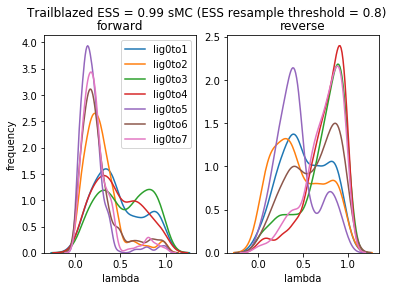

In [105]:
#now we will plot the histogrammed data
fig, axs = plt.subplots(1, 2)
fig.suptitle('Trailblazed ESS = 0.99 sMC (ESS resample threshold = 0.8)')
counter = 1

#ax 0
for i in range(1, 8):
    data = feps_99_threshold[i]
    spruce = np.hstack(np.array([np.array(q.protocols['forward']) for q in data]))
    sns.distplot(spruce, kde = True, hist = False, label = f"lig0to{i}", ax = axs[0])
    axs[0].set(ylabel=f"frequency")
    axs[0].set(xlabel='lambda')
    axs[1].set(xlabel='lambda')
    axs[0].set_title('forward')
    axs[1].set_title('reverse')
    
    _spruce = np.hstack(np.array([np.array(q.protocols['reverse']) for q in data]))
    sns.distplot(_spruce, kde = True, hist = False, ax = axs[1])
    
    #axs[0].legend(loc = 'best')
            


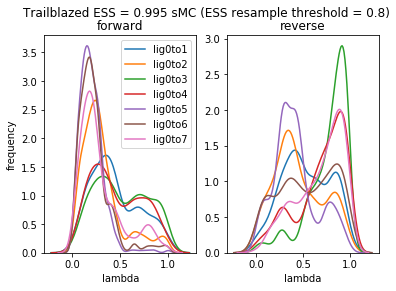

In [106]:
#now we will plot the histogrammed data
fig, axs = plt.subplots(1, 2)
fig.suptitle('Trailblazed ESS = 0.995 sMC (ESS resample threshold = 0.8)')
counter = 1

#ax 0
for i in range(1, 8):
    data = feps_995_threshold[i]
    spruce = np.hstack(np.array([np.array(q.protocols['forward']) for q in data]))
    sns.distplot(spruce, kde = True, hist = False, label = f"lig0to{i}", ax = axs[0])
    axs[0].set(ylabel=f"frequency")
    axs[0].set(xlabel='lambda')
    axs[1].set(xlabel='lambda')
    axs[0].set_title('forward')
    axs[1].set_title('reverse')
    
    _spruce = np.hstack(np.array([np.array(q.protocols['reverse']) for q in data]))
    sns.distplot(_spruce, kde = True, hist = False, ax = axs[1])
    
    #axs[0].legend(loc = 'best')

## Now we can plot the survival rates


x and y must have same first dimension, but have shapes (160,) and (172,)
8


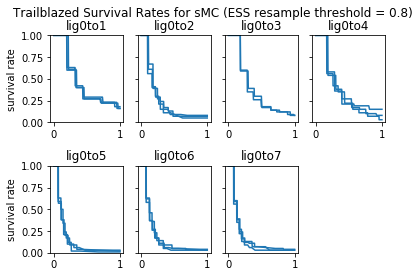

In [125]:
#now we will plot all of the trailblazed protocols
fig, axs = plt.subplots(2,4)
fig.suptitle('Trailblazed Survival Rates for sMC (ESS resample threshold = 0.8)')
counter = 1
for row in range(2):
    for col in range(4):
        try:
            if col > 0:
                axs[row, col].set_yticklabels([])
            else:
                axs[row, col].set(ylabel=f"survival rate")
            axs[row, col].set_title(f"lig0to{counter}")
            for entry in feps_99_threshold[counter]:
                axs[row, col].plot(entry.protocols['forward'], entry.survival_rate['forward'], color = 'tab:blue')
                #axs[row, col].plot(entry.protocols['reverse'], entry.survival_rate['reverse'], color = 'tab:orange')
                axs[row, col].set_ylim([0, 1])
    #             for entry in feps_995_threshold[counter]:
    #                 axs[row, col].plot(entry.protocols['forward'], color = 'tab:orange')
    #                 axs[row, col].plot(entry.protocols['reverse'], color = 'tab:orange')
        except Exception as e:
            print(e)
        counter += 1

            
fig.subplots_adjust(hspace=.5)    
fig.delaxes(axs[1][3])

for 
axs[row, col].plot(entry.survival_rate['forward'], color = 'tab:blue')
axs[row, col].plot(entry.survival_rate['reverse'], color = 'tab:orange')

In [133]:
for i in range(1,8):
    print(len(feps_99_threshold[i][0].survival_rate['forward']))
    print(f"protocols forward: ", len(feps_99_threshold[i][0].protocols['forward']))
    #print(feps_99_threshold[i][0].protocols['forward'])
    print(len(feps_99_threshold[i][0].survival_rate['reverse']))
    print(f"protocols reverse: ", len(feps_99_threshold[i][0].protocols['reverse']))
    #print(feps_99_threshold[i][0].protocols['reverse'])
    print(feps_99_threshold[i][0].cumulative_work['forward'].shape)
    print(feps_99_threshold[i][0].cumulative_work['reverse'].shape)
    print()
                       

116
protocols forward:  116
116
protocols reverse:  95
(100, 116)
(100, 116)

140
protocols forward:  140
140
protocols reverse:  137
(100, 140)
(100, 140)

200
protocols forward:  200
200
protocols reverse:  170
(100, 200)
(100, 200)

178
protocols forward:  178
178
protocols reverse:  148
(100, 178)
(100, 178)

146
protocols forward:  146
146
protocols reverse:  124
(100, 146)
(100, 146)

164
protocols forward:  164
164
protocols reverse:  128
(100, 164)
(100, 164)

168
protocols forward:  168
168
protocols reverse:  130
(100, 168)
(100, 168)



In [137]:
feps_99_threshold[i][0].cumulative_work['reverse'][2,-50:]

array([0.46332599, 0.72328937, 0.9394035 , 1.02436141, 1.15512612,
       1.19036212, 1.4080423 , 1.5031795 , 1.61084505, 1.76040229,
       2.39465029, 4.82066845, 4.82066845, 4.82066845, 4.82066845,
       4.82066845, 4.82066845, 4.82066845, 4.82066845, 4.82066845,
       4.82066845, 4.82066845, 4.82066845, 4.82066845, 4.82066845,
       4.82066845, 4.82066845, 4.82066845, 4.82066845, 4.82066845,
       4.82066845, 4.82066845, 4.82066845, 4.82066845, 4.82066845,
       4.82066845, 4.82066845, 4.82066845, 4.82066845, 4.82066845,
       4.82066845, 4.82066845, 4.82066845, 4.82066845, 4.82066845,
       4.82066845, 4.82066845, 4.82066845, 4.82066845, 4.82066845])

In [157]:
feps_99_threshold[i][0].cumulative_work['reverse'][2,94:]

array([-1.52830668e+00, -1.65202419e+00, -1.77104357e+00, -1.87557703e+00,
       -2.00751627e+00, -2.11792241e+00, -2.43269734e+00, -2.50825898e+00,
       -2.56463658e+00, -2.61005187e+00, -2.68913711e+00, -2.75726005e+00,
       -2.80776498e+00, -2.59556596e+00, -2.58029703e+00, -1.94485884e+00,
       -1.55882888e+00, -1.21860573e+00, -1.05221351e+00, -6.49348579e-01,
       -2.60578048e-01, -2.96373909e-03,  1.73607771e-01,  3.05938525e-01,
        4.63325991e-01,  7.23289367e-01,  9.39403499e-01,  1.02436141e+00,
        1.15512612e+00,  1.19036212e+00,  1.40804230e+00,  1.50317950e+00,
        1.61084505e+00,  1.76040229e+00,  2.39465029e+00,  4.82066845e+00,
        4.82066845e+00,  4.82066845e+00,  4.82066845e+00,  4.82066845e+00,
        4.82066845e+00,  4.82066845e+00,  4.82066845e+00,  4.82066845e+00,
        4.82066845e+00,  4.82066845e+00,  4.82066845e+00,  4.82066845e+00,
        4.82066845e+00,  4.82066845e+00,  4.82066845e+00,  4.82066845e+00,
        4.82066845e+00,  

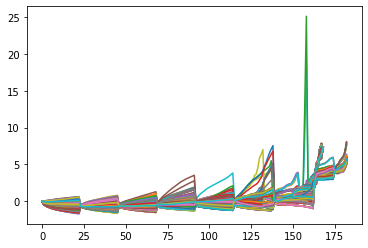